In [5]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("merged_weather_7months_cleaned.csv")

df.fillna({'AQI': df['AQI'].mean()}, inplace=True)

# Selecting features & target
X = df[['PM 1 - ug/m³', 'PM 2.5 - ug/m³', 'PM 10 - ug/m³',
        'Temp - °C', 'Hum - %', 'Dew Point - °C', 'Wet Bulb - °C', 'Heat Index - °C']]
Y = df['AQI']

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Save model
joblib.dump(lr_model, "linear_regression_aqi.pkl")

# Evaluate model
Y_pred = lr_model.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(Y_test, Y_pred))
print("Linear Regression R² Score:", r2_score(Y_test, Y_pred))


Linear Regression MAE: 2.9979319759129677
Linear Regression R² Score: 0.9773217136300135


In [6]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)

# Save model
joblib.dump(dt_model, "decision_tree_aqi.pkl")

# Evaluate model
Y_pred = dt_model.predict(X_test)
print("Decision Tree MAE:", mean_absolute_error(Y_test, Y_pred))
print("Decision Tree R² Score:", r2_score(Y_test, Y_pred))


Decision Tree MAE: 0.23589499906403447
Decision Tree R² Score: 0.9998366046250214


In [8]:
from sklearn.neural_network import MLPClassifier

# Convert AQI to categories for classification (you may need to define bins)
Y_class = pd.cut(Y, bins=[0, 50, 100, 150, 200, 300, 500], labels=[0, 1, 2, 3, 4, 5], include_lowest=True)

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_class, test_size=0.2, random_state=42)

# Train MLP Classifier Model
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(X_train, Y_train)

# Save model
joblib.dump(mlp_model, "mlp_classifier_aqi.pkl")

# Evaluate model
Y_pred = mlp_model.predict(X_test)
print("MLP Classifier Accuracy:", mlp_model.score(X_test, Y_test))


MLP Classifier Accuracy: 0.9879044451164197


In [9]:
from sklearn.naive_bayes import GaussianNB

# Train Gaussian Naïve Bayes Model
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)

# Save model
joblib.dump(gnb_model, "gaussian_nb_aqi.pkl")

# Evaluate model
Y_pred = gnb_model.predict(X_test)
print("Gaussian Naïve Bayes Accuracy:", gnb_model.score(X_test, Y_test))


Gaussian Naïve Bayes Accuracy: 0.936800725733293


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Save model
joblib.dump(rf_model, "random_forest_aqi.pkl")

# Evaluate model
Y_pred = rf_model.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(Y_test, Y_pred))
print("Random Forest R² Score:", r2_score(Y_test, Y_pred))


Random Forest MAE: 0.002577562745690959
Random Forest R² Score: 0.9972293440986665


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


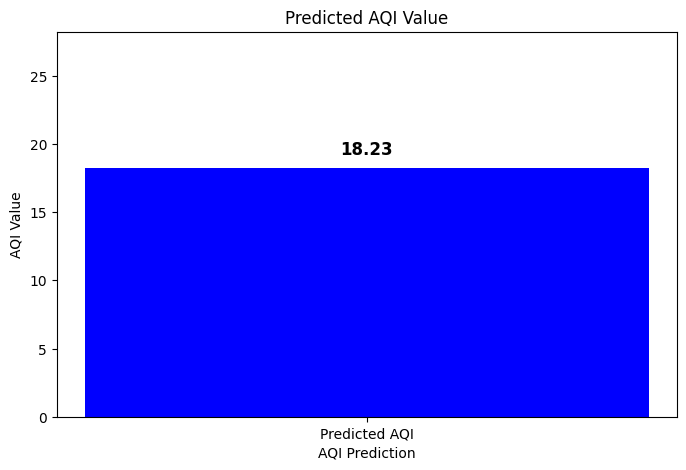

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


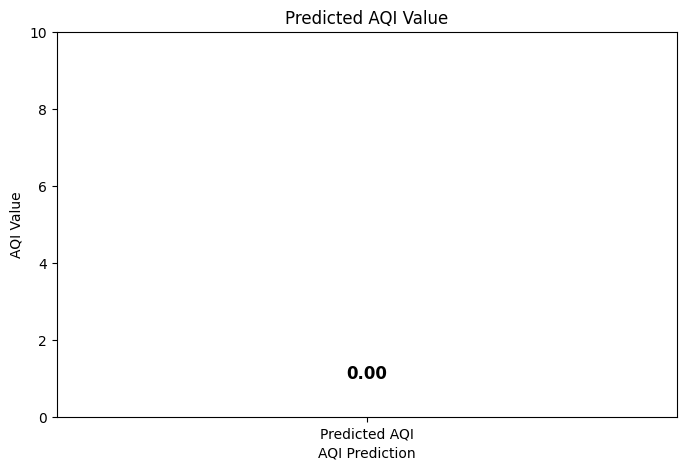

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


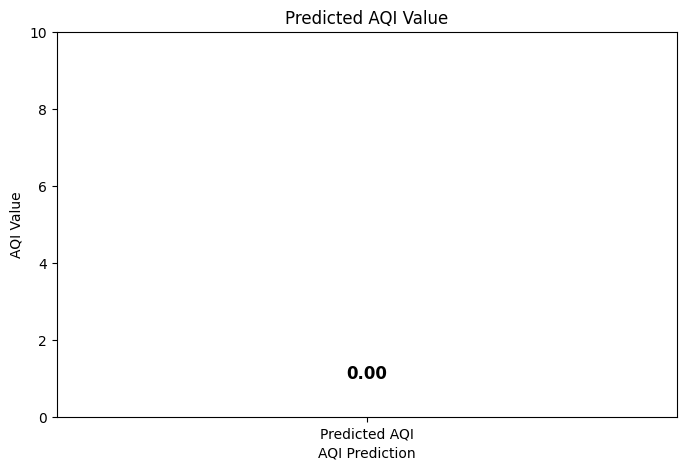

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


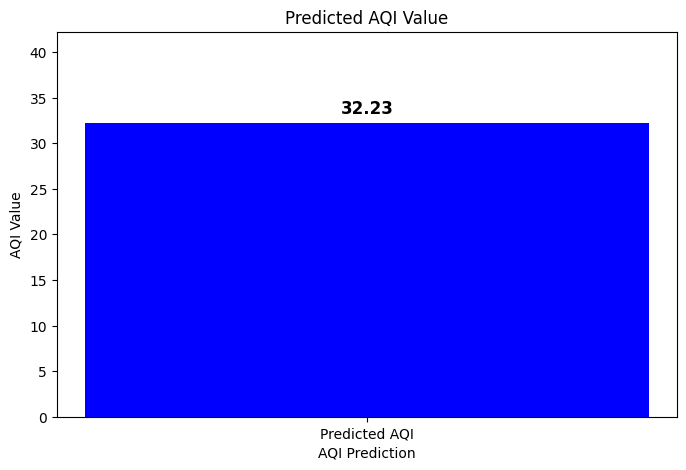

In [4]:
import tkinter as tk
from tkinter import messagebox, ttk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Load trained models
rf_model = joblib.load('random_forest_aqi.pkl')
dl_model = joblib.load('decision_tree_aqi.pkl')
lr_model = joblib.load('linear_regression_aqi.pkl')
gnb_model = joblib.load('gaussian_nb_aqi.pkl')
mlp_model = joblib.load('mlp_classifier_aqi.pkl')

# Creating Tkinter GUI
root = tk.Tk()
root.title("AQI Prediction App")
root.geometry("400x550")

tk.Label(root, text="Enter Weather Parameters", font=("Arial", 12, "bold")).pack()

entry_labels = ["PM1 (µg/m³)", "PM2.5 (µg/m³)", "PM10 (µg/m³)", "Temp (°C)", "Humidity (%)", "Dew Point (°C)", "Wet Bulb (°C)", "Heat Index (°C)"]
entries = []
for label in entry_labels:
    tk.Label(root, text=label).pack()
    entry = tk.Entry(root)
    entry.pack()
    entries.append(entry)

tk.Label(root, text="Select Model", font=("Arial", 12, "bold")).pack()
model_options = [
    "Random Forest + Linear Regression",
    "Decision Tree + Linear Regression",
    "Random Forest + MLP Classifier",
    "Gaussian Naïve + MLP Classifier"
]
model_var = tk.StringVar()
model_dropdown = ttk.Combobox(root, textvariable=model_var, values=model_options, state="readonly")
model_dropdown.pack()
model_dropdown.current(0)

def predict_aqi():
    try:
        new_data = np.array([[float(entry.get()) for entry in entries]])
        selected_model = model_var.get()

        if selected_model == "Random Forest + Linear Regression":
            rf_pred = rf_model.predict(new_data)
            lr_pred = lr_model.predict(new_data)
            predicted_aqi = (rf_pred.flatten() + lr_pred.flatten()) / 2
        elif selected_model == "Decision Tree + Linear Regression":
            dt_pred = dl_model.predict(new_data)
            lr_pred = lr_model.predict(new_data)
            predicted_aqi = (dt_pred.flatten() + lr_pred.flatten()) / 2
        elif selected_model == "Random Forest + MLP Classifier":
            rf_pred = rf_model.predict(new_data)
            mlp_pred = mlp_model.predict(new_data)
            predicted_aqi = (rf_pred.flatten() + mlp_pred.flatten()) / 2
        elif selected_model == "Gaussian Naïve + MLP Classifier":
            gnb_pred = gnb_model.predict(new_data)
            mlp_pred = mlp_model.predict(new_data)
            predicted_aqi = (gnb_pred.flatten() + mlp_pred.flatten()) / 2
        else:
            messagebox.showerror("Model Error", "Invalid model selection.")
            return

        result_label.config(text=f"Predicted AQI: {float(predicted_aqi[0]):.2f}")
        show_graph(float(predicted_aqi[0]))
    
    except ValueError as e:
        messagebox.showerror("Input Error", f"Please enter valid numerical values.\nError: {str(e)}")


def show_graph(predicted_aqi):
    labels = ['Predicted AQI']
    values = [predicted_aqi]
    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=['blue'])
    plt.xlabel("AQI Prediction")
    plt.ylabel("AQI Value")
    plt.title("Predicted AQI Value")
    plt.ylim(0, max(values) + 10)
    plt.text(0, values[0] + 1, f"{values[0]:.2f}", ha='center', fontsize=12, fontweight='bold')
    plt.show()

tk.Button(root, text="Predict AQI", command=predict_aqi).pack()
result_label = tk.Label(root, text="", font=("Arial", 12))
result_label.pack()

root.mainloop()
